In [27]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint


In [28]:
cdc_df = pd.read_csv("CDC.csv")
cdc_df.head()

,Disease,MMWR year,MMWR week,Current week,"Current week, flag",Cum 2018,"Cum 2018, flag",5-year weekly average,"5-year weekly average§, flag",Total cases reported for pervious years 2017,"Total cases reported for pervious years 2017, flag",Total cases reported for pervious years 2016,"Total cases reported for pervious years 2016, flag",Total cases reported for pervious years 2015,"Total cases reported for pervious years 2015, flag",Total cases reported for pervious years 2014,"Total cases reported for pervious years 2014, flag",Total cases reported for pervious years 2013,"Total cases reported for pervious years 2013, flag",States reporting cases during current week (No.)
0,Anthrax,2018.0,1.0,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,6.0,NaN,115,NaN,247.0,NaN,896.0,NaN,NaN,NN,NaN,NN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,3,NaN,7.0,NaN,6.0,NaN,8.0,NaN,8.0,NaN,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,67,NaN,15.0,NaN,11.0,NaN,11.0,NaN,22.0,NaN,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,NaN,-,44,NaN,35.0,NaN,55.0,NaN,80.0,NaN,85.0,NaN,NaN


In [29]:
cdc_short = cdc_df.drop(['Current week','Current week, flag', 
                         'Cum 2018','Cum 2018, flag', 
                         'MMWR year',
                         'MMWR week',
            'Total cases reported for pervious years 2017, flag',
             'Total cases reported for pervious years 2016, flag',
             'Total cases reported for pervious years 2015, flag',
            'Total cases reported for pervious years 2014, flag',
            'Total cases reported for pervious years 2013, flag'], axis=1)
cdc_short.head()

,Disease,5-year weekly average,"5-year weekly average§, flag",Total cases reported for pervious years 2017,Total cases reported for pervious years 2016,Total cases reported for pervious years 2015,Total cases reported for pervious years 2014,Total cases reported for pervious years 2013,States reporting cases during current week (No.)
0,Anthrax,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",6.0,NaN,115,247.0,896.0,NaN,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",0.0,NaN,3,7.0,6.0,8.0,8.0,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",0.0,NaN,67,15.0,11.0,11.0,22.0,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",NaN,-,44,35.0,55.0,80.0,85.0,NaN


In [30]:
cdc_shorter = cdc_short.drop(cdc_short.columns[[1,2,8]], axis=1)
cdc_shorter.head()

,Disease,Total cases reported for pervious years 2017,Total cases reported for pervious years 2016,Total cases reported for pervious years 2015,Total cases reported for pervious years 2014,Total cases reported for pervious years 2013
0,Anthrax,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",115,247.0,896.0,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",3,7.0,6.0,8.0,8.0
3,"Arboviral diseases, neuroinvasive and nonneur...",67,15.0,11.0,11.0,22.0
4,"Arboviral diseases, neuroinvasive and nonneur...",44,35.0,55.0,80.0,85.0


In [31]:
cdc_shorter = cdc_shorter.rename(index=str, columns={"Total cases reported for pervious years  2017": "2017", 
                                           "Total cases reported for pervious years 2016": "2016",
                                           "Total cases reported for pervious years 2015": "2015",
                                           "Total cases reported for pervious years 2014": "2014",
                                           "Total cases reported for pervious years 2013": "2013"
                                          }
)

In [32]:
cdc_shorter.head()

,Disease,2017,2016,2015,2014,2013
0,Anthrax,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",115,247.0,896.0,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",3,7.0,6.0,8.0,8.0
3,"Arboviral diseases, neuroinvasive and nonneur...",67,15.0,11.0,11.0,22.0
4,"Arboviral diseases, neuroinvasive and nonneur...",44,35.0,55.0,80.0,85.0


In [33]:
column_order = cdc_shorter.columns.tolist()
column_order = column_order[::-1]
cdc_shorter = cdc_shorter[column_order]

In [34]:
cdc_shorter.head()

,2013,2014,2015,2016,2017,Disease
0,NaN,NaN,NaN,NaN,NaN,Anthrax
1,NaN,NaN,896.0,247.0,115,"Arboviral diseases, neuroinvasive and nonneur..."
2,8.0,8.0,6.0,7.0,3,"Arboviral diseases, neuroinvasive and nonneur..."
3,22.0,11.0,11.0,15.0,67,"Arboviral diseases, neuroinvasive and nonneur..."
4,85.0,80.0,55.0,35.0,44,"Arboviral diseases, neuroinvasive and nonneur..."


In [35]:
cdc_shorter_two = cdc_shorter.drop(cdc_shorter.index[0:29])

In [36]:
cdc_shorter_two.head()

,2013,2014,2015,2016,2017,Disease
29,187.0,667.0,188.0,85.0,122,Measles
30,142.0,123.0,120.0,126.0,66,"Meningococcal disease, Serogroups ACWY"
31,99.0,89.0,111.0,86.0,67,"Meningococcal disease, Serogroup B"
32,17.0,25.0,21.0,21.0,14,"Meningococcal disease, Other serogroups"
33,298.0,196.0,120.0,142.0,187,"Meningococcal disease, Unknown serogroup"


In [37]:
cdc_shorter_three = cdc_shorter_two.drop(cdc_shorter.index[30:3393])

In [38]:
cdc_shorter_three

,2013,2014,2015,2016,2017,Disease
29,187.0,667.0,188.0,85.0,122,Measles


In [109]:
cdc_shorter_three = cdc_shorter_three.reset_index(drop=True)
cdc_shorter_three

,2013,2014,2015,2016,2017,Disease
0,187.0,667.0,188.0,85.0,122,Measles


In [39]:
#Setting column headers as x-axis   
#plt.style.use('ggplot')
#ax = df[['Men','Women']].plot(kind='bar', title ="Population",figsize=(15,10),legend=True, fontsize=12)
#ax.set_xlabel("Areas",fontsize=12)
#ax.set_ylabel("Population",fontsize=12)
#plt.show()

In [40]:
#cdc_df2 = cdc_shorter.iloc[29]

In [41]:
#cdc_df2.head()

In [42]:
#measles

In [43]:
#measles_df = pd.DataFrame(measles)

In [44]:
#measles_df

In [45]:
#measles_df.head()

In [46]:
#column_order = measles_df.columns.tolist()
#column_order = column_order[::-1]
#measles_df = measles_df[column_order]

In [47]:
#measles_df

In [48]:
#measles_df2 = measles_df.transpose()

In [49]:
cdc_shorter.head()

,2013,2014,2015,2016,2017,Disease
0,NaN,NaN,NaN,NaN,NaN,Anthrax
1,NaN,NaN,896.0,247.0,115,"Arboviral diseases, neuroinvasive and nonneur..."
2,8.0,8.0,6.0,7.0,3,"Arboviral diseases, neuroinvasive and nonneur..."
3,22.0,11.0,11.0,15.0,67,"Arboviral diseases, neuroinvasive and nonneur..."
4,85.0,80.0,55.0,35.0,44,"Arboviral diseases, neuroinvasive and nonneur..."


In [50]:
#years = list(cdc_shorter.columns.values)

In [51]:
#list(cdc_shorter)

In [52]:
#years

In [53]:
NNDSS_df = pd.read_csv("NNDSS_-_TABLE_1V._Malaria_to_Measles__Imported-10.csv")
NNDSS_df.head()

,Reporting Area,MMWR Year,MMWR Week,"Malaria, Current week","Malaria, Current week, flag","Malaria, Previous 52 weeks Max","Malaria, Previous 52 weeks Max, flag","Malaria, Cum 2019","Malaria, Cum 2019, flag","Malaria, Cum 2018",...,Measles Imported Current week flag,Measles Imported Previous 52 weeks Max,Measles Imported Previous 52 weeks Max flag,Measles Imported Cum 2019,Measles Imported Cum 2019 flag,Measles Imported Cum 2018,Measles Imported Cum 2018 flag,Location 1,Location 2,Reporting Area Sort
0,ALASKA,2019,1,NaN,-,1.0,NaN,NaN,-,NaN,...,-,0.0,NaN,NaN,-,NaN,-,"ALASKA\n(63.631126, -151.631889)",NaN,20190158
1,PENNSYLVANIA,2019,1,NaN,-,8.0,NaN,NaN,-,NaN,...,-,1.0,NaN,NaN,-,NaN,-,"PENNSYLVANIA\n(40.896694, -77.838886)",NaN,20190113
2,WEST SOUTH CENTRAL,2019,1,NaN,-,5.0,NaN,NaN,-,NaN,...,-,1.0,NaN,NaN,-,NaN,-,NaN,WEST SOUTH CENTRAL,20190143
3,INDIANA,2019,1,NaN,-,1.0,NaN,NaN,-,1.0,...,-,1.0,NaN,NaN,-,1.0,NaN,"INDIANA\n(39.919991, -86.2818)",NaN,20190116
4,AMERICAN SAMOA,2019,1,NaN,-,0.0,NaN,NaN,-,NaN,...,-,0.0,NaN,NaN,-,NaN,-,NaN,AMERICAN SAMOA,20190164


In [54]:
NNDSS_df2 = NNDSS_df.drop(NNDSS_df.columns[[1,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,27,28,29]], axis=1)
NNDSS_df2

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
0,ALASKA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,PENNSYLVANIA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
2,WEST SOUTH CENTRAL,1,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN
3,INDIANA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,1.0
4,AMERICAN SAMOA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
5,TOTAL,1,NaN,9.0,NaN,NaN,NaN,16.0,NaN,1.0
6,VERMONT,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
7,SOUTH DAKOTA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
8,WEST NORTH CENTRAL,1,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN
9,OKLAHOMA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [55]:
NNDSS_HALF = NNDSS_df2.loc[NNDSS_df2["MMWR Week"] == 26]
NNDSS_HALF.head()

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
1750,US RESIDENTS,26,NaN,60.0,668.0,38.0,17.0,68.0,375.0,60.0
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN


In [56]:
NNDSS_HALF.count()

Reporting Area                               70
MMWR Week                                    70
Measles Indigenous Current week               0
Measles Indigenous Previous 52 weeks Max     69
Measles Indigenous Cum 2019                  29
Measles Indigenous Cum 2018                  14
Measles Imported Current week                 5
Measles Imported Previous 52 weeks Max       69
Measles Imported Cum 2019                    36
Measles Imported Cum 2018                    33
dtype: int64

In [57]:
NNDSS_HALF_CLEAN = NNDSS_HALF.drop([1750,1758,1777,1793,1807,1819], axis=0)
NNDSS_HALF_CLEAN.count()

Reporting Area                               64
MMWR Week                                    64
Measles Indigenous Current week               0
Measles Indigenous Previous 52 weeks Max     63
Measles Indigenous Cum 2019                  23
Measles Indigenous Cum 2018                   8
Measles Imported Current week                 2
Measles Imported Previous 52 weeks Max       63
Measles Imported Cum 2019                    30
Measles Imported Cum 2018                    27
dtype: int64

In [58]:
NNDSS_HALF_CLEAN.sum()

Reporting Area                               NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...
MMWR Week                                                                                 1664
Measles Indigenous Current week                                                              0
Measles Indigenous Previous 52 weeks Max                                                   145
Measles Indigenous Cum 2019                                                                681
Measles Indigenous Cum 2018                                                                 59
Measles Imported Current week                                                               17
Measles Imported Previous 52 weeks Max                                                     150
Measles Imported Cum 2019                                                                  438
Measles Imported Cum 2018                                                                   85
dtype: object

In [59]:
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN


In [60]:
NNDSS_HALF_CLEAN.to_csv("measles_summary.csv", header = True, index = False)
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN


In [128]:
measles_summary_df = pd.read_csv("measles_summarized.csv")

In [129]:
measles_summary_df

,Disease,2018,2019
0,NEW ENGLAND,6,10
1,CONNECTICUT,5,3
2,MAINE,2,2
3,MASSACHUSETTS,2,3
4,NEW HAMPSHIRE,1,2
5,RHODE ISLAND,0,0
6,VERMONT,1,0
7,NEW JERSEY,15,14
8,NEW YORK,60,206
9,NEW YORK CITY,51,544


In [130]:
measles_total = measles_summary_df.drop(measles_summary_df.index[0:64])

In [131]:
measles_total

,Disease,2018,2019
64,Measles,368,1102


In [132]:
measles_total = measles_total.reset_index(drop=True)
measles_total

,Disease,2018,2019
0,Measles,368,1102


In [133]:
#combined measles
combined_measles = pd.merge(cdc_shorter_three, measles_total, how="outer", on="Disease")
combined_measles.head()

,2013,2014,2015,2016,2017,Disease,2018,2019
0,187.0,667.0,188.0,85.0,122,Measles,368,1102


In [165]:
complete_measles = combined_measles.drop(combined_measles.columns[5], axis=1)
complete_measles

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122,368,1102


In [166]:
years = complete_measles.keys()
years

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

In [175]:
cases = complete_measles.iloc[0]
cases

2013     187
2014     667
2015     188
2016      85
2017     122
2018     368
2019    1102
Name: 0, dtype: object

Text(0, 0.5, 'Reported Cases')

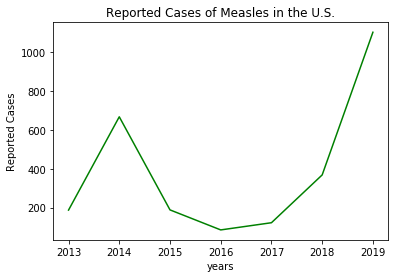

In [190]:
measles_plot, = plt.plot(years, cases, color="green")
plt.title("Reported Cases of Measles in the U.S.")
plt.xlabel("years")
plt.ylabel("Reported Cases")


In [160]:
x_axis = np.arange(len(years))
x_axis

array([0, 1, 2, 3, 4, 5, 6])

In [196]:
measles_bar = complete_measles.transpose()
measles_bar

,0
2013,187
2014,667
2015,188
2016,85
2017,122
2018,368
2019,1102


In [205]:
values = measles_bar.loc[0]
values

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [200]:
plt.bar(years, measles_bar.loc[0], color='r', alpha=0.5, align="center")

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [151]:
#measles_summary_df = measles_summary_df.drop(measles_summary_df.columns[[1,2,4,5,6,7,8,9]], axis=1)
#measles_summary_df

In [76]:
#MMAX = NNDSS_HALF_CLEAN["Measles Indigenous Previous 52 weeks Max"]

In [66]:
#NNDSS_HALF_CLEAN = NNDSS_HALF_CLEAN.rename(index=str, columns=
                                             {"Measles Indigenous Current week" : "MIDCW",
                                              "Measles Indigenous Previous 52 weeks Max" : "MIDMAX",
                                              "Measles Indigenous Cum 2019" : "MID 2019"
}
)

IndentationError: unexpected indent (<ipython-input-66-42448fa14d99>, line 2)

In [67]:
#NNDSS_HALF_CLEAN.head()

In [68]:
#NNDSS_HALF_CLEAN['Measles Indigenous Previous 52 weeks Max']

In [69]:
#NNDSS_HALF_CLEAN['2019'] = NNDSS_HALF_CLEAN['Measles , Idigenousis, Cum 2019'] + NNDSS_HALF_CLEAN['Measles , Imported, Cum 2019'] - NNDSS_HALF_CLEAN['Measles , Imported, Current week']